In [1]:
#lets load in the packages that we need
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr,spearmanr
#plt.style.use('dark_background')

In [5]:
#load and check the data
df = pd.read_csv("C:/Users/96655/Desktop/bike_share_data.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# prepare the data by creating a month and year column and total riders columns
df['datetime'] =  pd.to_datetime(df['datetime'])
df['month'] =  df['datetime'].dt.strftime('%B')
df['year'] = df.datetime.dt.year
df['month_num'] = df['datetime'].dt.month
df['day number'] =df['datetime'].dt.dayofweek
df['day of week'] =df['datetime'].dt.strftime('%A')
df['total riders'] = df['casual'] + df['registered']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1


In [7]:
#map the seson dictionary to the season numerical column
seasons_mapping = {1: 'winter',
                   2: 'spring',
                   3: 'summer', 
                   4: 'fall'}
df['season'] = df['season'].map(seasons_mapping)

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_num,day number,day of week,total riders
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,2011,1,5,Saturday,16
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,2011,1,5,Saturday,40
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2011,1,5,Saturday,32
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,2011,1,5,Saturday,13
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,2011,1,5,Saturday,1


In [9]:
#what percent of the riders are registered
df['registered'].sum()/df['total riders'].sum()

0.811968586548107

In [10]:
#does the registered rider percentage increase by month over time?
df.groupby(['season','month',])['registered'].sum()/df.groupby('month')['total riders'].sum()

season  month    
fall    December     0.908217
        November     0.856308
        October      0.816390
spring  April        0.762171
        June         0.779942
        May          0.793727
summer  August       0.785168
        July         0.762614
        September    0.784025
winter  February     0.906198
        January      0.909218
        March        0.812316
dtype: float64

In [11]:
#what is the percent of riders by month 
df.groupby('month').sum()['total riders']/df['total riders'].sum()*100

month
April         8.027040
August       10.238238
December      7.679781
February      4.752536
January       3.830492
July         10.291032
June         10.584298
March         6.401464
May           9.597185
November      8.460419
October       9.946602
September    10.190911
Name: total riders, dtype: float64

In [12]:
# what is the percent of riders by season 
df.groupby(['season']).sum()[['total riders']]/df['total riders'].sum()

,total riders
season,
fall,0.260868
spring,0.282085
summer,0.307202
winter,0.149845


In [13]:
#Percent of registered riders on a working day
df.groupby('workingday').sum()['registered']/df['registered'].sum()

workingday
0    0.265059
1    0.734941
Name: registered, dtype: float64

In [14]:
# create a total riders columns
df = df[df['registered'] >0]
df['total riders'] = df['casual'] + df['registered']
df['hour'] =df['datetime'].dt.hour

In [15]:

#create a mean month and isolate a single year
df = df[df['year']==2011]
df['mean_month'] = df['month'].map(df.groupby('month')['total riders'].median())

In [16]:
#check out the average total riders by month 
df.groupby('month')['total riders'].mean()

month
April        111.507726
August       183.065934
December     134.173246
February      73.797753
January       54.892774
July         203.614035
June         196.877193
March         87.818594
May          174.809211
November     155.458333
October      174.773626
September    176.164811
Name: total riders, dtype: float64

In [17]:
#create a month dictionary for the visual below
month_dict = []
for i in enumerate(df['month'].unique(),1):
    month_dict.append(i)
month_dict = dict(month_dict)

C:\Users\96655\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\96655\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Temp Distribution and Rider Aggregation')

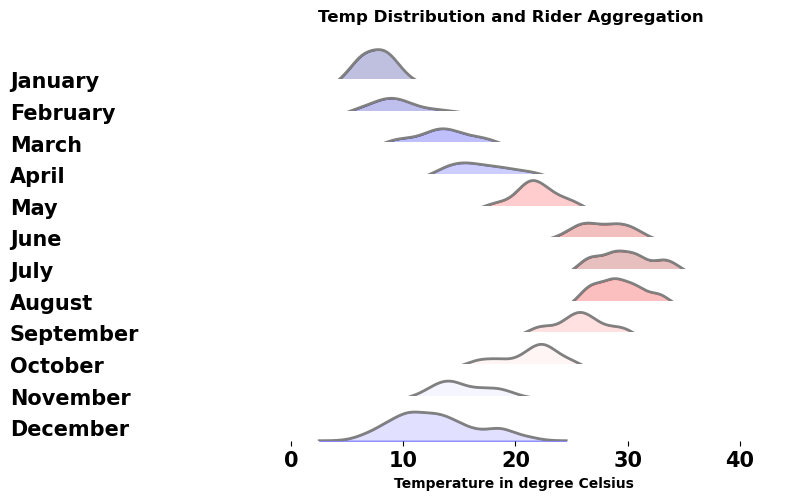

In [20]:
#Analyze & Visualize Your Data
#Create a Ridge Plot
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='seismic', n_colors=12,)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row='month', aspect=15,height=0.4, hue='mean_month',palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'temp',fill=True, lw=1)
# adding a liner graph for the outline
g.map(sns.kdeplot, 'temp',lw=2,color='grey')


#We use the facet grid axes(g.axes.flat) and add the month as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-25, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15)
    
#Lets adjust the plots so they overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.set_xlabels("")
g.set_ylabels("")
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Temp Distribution and Rider Aggregation',fontweight='bold')

In [21]:
#Calculate Correlation 
correlations = []
def correlation_matrix(data,col1,col2,col3,col4):
    correlation1_sp =spearmanr(data[col1],data[col2])[0]
    correlation2_sp = spearmanr(data[col3],data[col4])[0]
    correlation3_sp = pearsonr(data[col1],data[col2])[0]
    correlation4_sp = pearsonr(data[col3],data[col4])[0]
    series = pd.Series({'registered (spearman)':correlation1_sp,
                        'casual (spearman)':correlation2_sp,
                        'registered (pearsonr)':correlation3_sp,
                        'casual (pearsonr)':correlation4_sp})
    return series
correlation_matrix(df,'registered','temp','casual','temp')  

registered (spearman)    0.391726
casual (spearman)        0.608284
registered (pearsonr)    0.369914
casual (pearsonr)        0.498210
dtype: float64